In [1]:
import sys
sys.path.append("..")
from random import seed
import logging
import numpy as np
import matplotlib.pyplot as plt
from federated_learning.helper import utils
CONFIG_PATH = '../configs/defaults.yml'

configs = utils.load_config(CONFIG_PATH)
logging.basicConfig(format='%(asctime)s %(message)s', level=configs['log']['level'])
seed(configs['runtime']['random_seed'])

In [2]:
def draw_samples(data):
    list_keys = list(data.keys())
    data_np = dict()
    data_np['x'] = np.array(data[list_keys[0]]['x'], dtype = np.float32).reshape(-1, 28, 28)
    data_np['y'] = np.array(data[list_keys[0]]['y'], dtype = np.int64).reshape(-1, 1)
    figure = plt.figure(figsize=(10,8))
    for i in range(60):
        plt.subplot(6, 10, i + 1)
        plt.axis("off")
        plt.title(data_np['y'][i])
        plt.imshow(data_np['x'][i], cmap='gray')
        
        
def get_flattted_data(data):
    data_flatted_x = np.array([], dtype = np.float32).reshape(0, 28 * 28)
    tmp_array = [np.array(data_['x'], dtype = np.float32).reshape(-1, 28 * 28) for data_ in data.values()]
    for dd in tmp_array:
        data_flatted_x = np.concatenate((data_flatted_x, dd))
    data_flatted_y = np.array([], dtype = np.float32)
    tmp_array_y = [np.array(data_['y'], dtype = np.int64).reshape(-1) for data_ in data.values()]
    for dd in tmp_array_y:
        data_flatted_y = np.concatenate((data_flatted_y, dd))

    return data_flatted_x, data_flatted_y
        
    
def dataset_info(dataset):
    list_keys = list(dataset.keys())
    numbers = dict()
    # numbers[num_samples] = num_users
    for uu, dd in dataset.items():
        key = str(len(dd['y']))
        if key in numbers:
            numbers[key] += 1
        else:
            numbers[key] = 1
        
    total_samples = 0
    for uu in sorted(numbers.keys()):
        print("{}:\t{}".format(uu, numbers[uu]))
        total_samples += int(uu) * int(numbers[uu])

    print("Mean num of samples/user: {}".format(
        round(np.mean([int(ii) for ii in numbers])), 2))
    print("Total Samples:\t{}".format(total_samples))
    print("Total Users:\t{}".format(len(list_keys)))
    print("[{}]: Images: {}, Pixels: {}".format(
        list_keys[0], 
        len(dataset[list_keys[0]]['x']), 
        len(dataset[list_keys[0]]['x'][0])))
    data_flatted_x, data_flatted_y = get_flattted_data(dataset)
    print("mean: {}\nstd: {},\nmax: {}".format(
            data_flatted_x.mean(), 
            data_flatted_x.std(), 
            data_flatted_x.max()))
    print("-"*5)

2020-12-15 23:33:47,195 Loading train dataset from /home/ubuntu/data/leaf_non_iid/data/femnist/data
2020-12-15 23:33:47,197 Loading 1 out of 3 files...
2020-12-15 23:33:50,127 Loading 2 out of 3 files...
2020-12-15 23:33:53,326 Loading 3 out of 3 files...
/home/savi/ehsan/venv/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


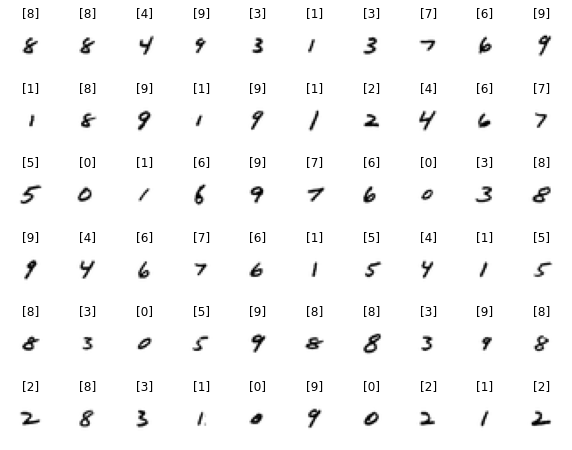

In [3]:
data = utils.load_leaf_train(configs['data']['FEMNIST_PATH'])
draw_samples(data)

2020-12-15 23:33:58,970 Start processing of femnist data...


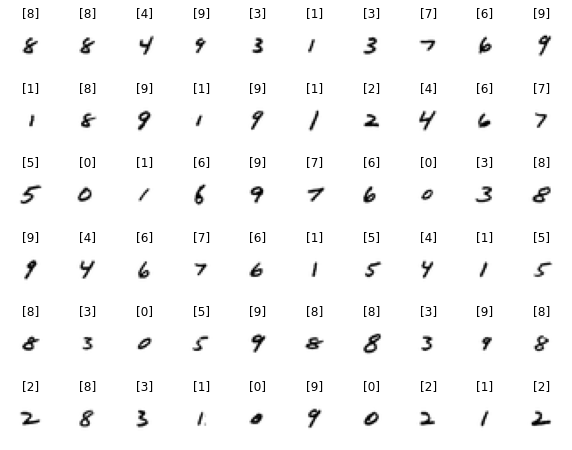

In [4]:
min_num_samples = 100
only_digits = True
processed_data = utils.preprocess_leaf_data(data, min_num_samples, only_digits)
draw_samples(processed_data)

In [7]:
data_test = utils.load_leaf_test(configs['data']['FEMNIST_PATH'])
min_num_samples = 10
only_digits = True
processed_data_test = utils.preprocess_leaf_data(data_test, min_num_samples, only_digits)

2020-12-15 23:35:52,659 Loading test dataset from /home/ubuntu/data/leaf_non_iid/data/femnist/data
2020-12-15 23:35:52,661 Loading 1 out of 3 files...
2020-12-15 23:35:52,962 Loading 2 out of 3 files...
2020-12-15 23:35:53,284 Loading 3 out of 3 files...
2020-12-15 23:35:53,663 Start processing of femnist data...


In [9]:
dataset_info(data)
print()
dataset_info(processed_data)
print()
dataset_info(data_test)
print()
dataset_info(processed_data_test)

113:	1
128:	1
135:	1
150:	1
159:	1
163:	1
185:	1
186:	1
189:	1
195:	1
198:	2
205:	2
210:	1
211:	2
212:	1
215:	1
216:	1
217:	1
219:	2
220:	2
221:	2
222:	2
223:	3
224:	1
226:	1
228:	1
230:	1
231:	1
233:	2
234:	1
236:	1
237:	2
238:	1
242:	1
243:	4
244:	1
246:	1
248:	1
249:	3
250:	2
251:	2
252:	2
254:	1
255:	1
256:	1
257:	3
258:	2
259:	1
260:	3
261:	3
262:	3
263:	2
265:	1
266:	1
267:	1
268:	3
270:	1
271:	2
272:	4
273:	1
274:	1
275:	4
277:	2
278:	3
279:	1
280:	1
283:	4
286:	4
287:	3
288:	4
289:	1
290:	2
291:	2
292:	4
293:	3
295:	2
296:	1
297:	4
298:	4
300:	1
301:	4
302:	2
303:	1
305:	3
306:	3
307:	2
308:	1
309:	5
310:	4
311:	1
312:	5
313:	2
315:	5
316:	7
317:	2
318:	3
319:	3
320:	3
323:	2
324:	9
326:	2
327:	2
328:	2
329:	2
330:	5
331:	5
332:	3
333:	2
334:	1
335:	4
337:	2
338:	1
339:	1
341:	3
342:	4
345:	3
347:	2
349:	2
351:	2
352:	1
353:	3
354:	3
355:	2
356:	3
357:	1
358:	3
359:	1
360:	2
361:	1
362:	3
363:	2
366:	1
368:	2
369:	1
372:	2
374:	2
375:	1
378:	1
380:	1
383:	1
393:	1
Mean num of s

In [10]:
def draw_pca(data_flatted_x, data_flatted_y):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)

    proj = pca.fit_transform(data_flatted_x)
    figure = plt.figure(figsize=(15, 8))
    plt.scatter(proj[:, 0], proj[:,1], c = data_flatted_y, cmap="rainbow")
    plt.ylim([-8, 8])
    plt.colorbar(ticks=range(len(np.unique(data_flatted_y))))

In [11]:
data_flatted_x, data_flatted_y = get_flattted_data(processed_data)

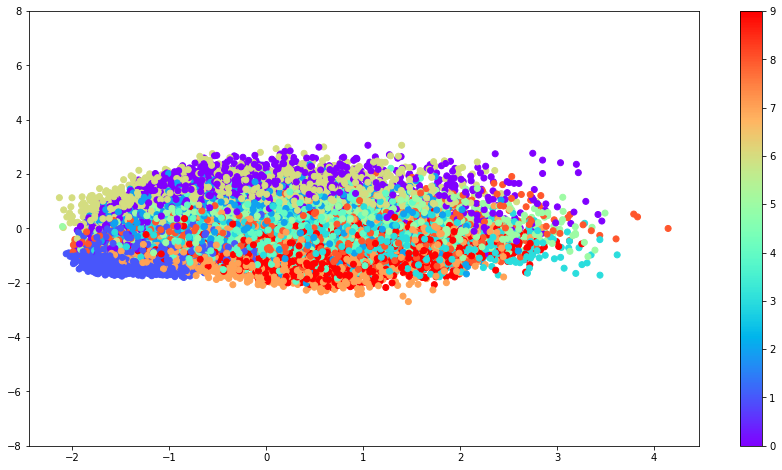

In [12]:
draw_pca(data_flatted_x, data_flatted_y)

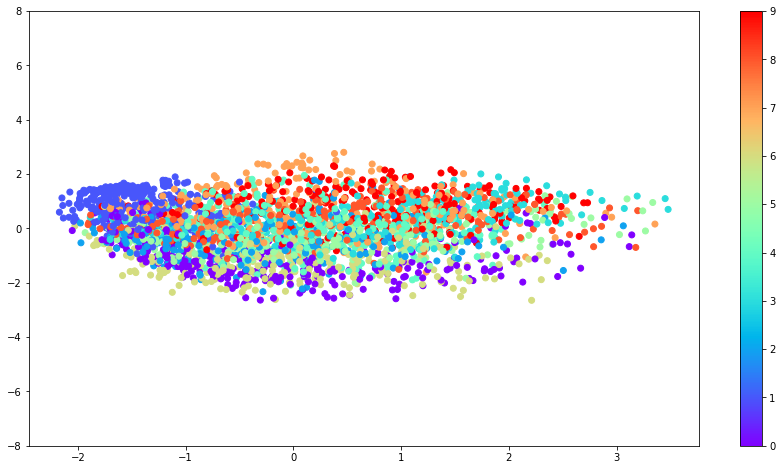

In [13]:
data_flatted_x, data_flatted_y = get_flattted_data(processed_data_test)
draw_pca(data_flatted_x, data_flatted_y)